<a href="https://colab.research.google.com/github/leanpina/EffectivePandas/blob/main/1_Series_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução a Series

>[Introdução a Series](#scrollTo=WQXa2aTTLJ_-)

>[Geração de uma Serie em Puro Python](#scrollTo=EvwNGWUTZBmu)

>[Atribuição de um indice do tipo 'string'](#scrollTo=8947pmHiZLlS)

>>[Inspeção do indice de uma série](#scrollTo=dbPz_rUxU95O)

>[Indice como uma string](#scrollTo=WqZ8lQnjYLp9)

>>[Inspeção do Indice](#scrollTo=5MlS_xFYYkRV)

>[Inserção de um tipo objeto na serie](#scrollTo=3AE4F_x8a-So)

>[O valor NaN (Not a Number)](#scrollTo=bcWe0HCvWABq)

>>[Integer que suporta NaN (Int64)](#scrollTo=5F-E6qSKi9yj)

>[Similaridade com o NumPy](#scrollTo=-76JhvF8no-O)

>>[Uso do array booleano](#scrollTo=CSR9kO8ipnYu)

>[Dados Categóricos](#scrollTo=uGLt8dTWs8WH)

>[Exercicios](#scrollTo=_EV1153SnABy)



#Geração de uma Serie em Puro Python

In [ ]:
series = {
    'index':[0, 1, 2, 3],
    'data':[145, 142, 38, 13],
    'name':'songs'
}

In [ ]:
def get(series, idx):
  value_idx = series['index'].index(idx)
  return series['data'][value_idx]

In [ ]:
get(series, 2)

38

#Atribuição de um indice do tipo 'string'

In [ ]:
songs = {
    'index':['Paul', 'John', 'George', 'Ringo'],
    'data':[145, 142, 38, 13],
    'name':'counts'
    }

In [ ]:
get(songs, 'John')

142

In [ ]:
import pandas as pd
songs2 = pd.Series([145,142,38,13],
                   name='counts')

In [ ]:
songs2

0    145
1    142
2     38
3     13
Name: counts, dtype: int64

##Inspeção do indice de uma série



In [ ]:
songs2.index

RangeIndex(start=0, stop=4, step=1)

#Indice como uma string

In [ ]:
songs3 = pd.Series([145,142,38,13],
                   name='counts',
                   index=['Paul', 'John', 'George', 'Ringo'])

## Inspeção do Indice

In [ ]:
songs3.index

Index(['Paul', 'John', 'George', 'Ringo'], dtype='object')

#Inserção de um tipo objeto na serie

- O datatype Object também aparece em series com valores de string
- Indices com valores numericos ou datatime possibilitam operações 

In [ ]:
class Foo:
  pass

In [ ]:
ringo = pd.Series(['Richard', 'Starkey', 13, Foo()],
                  name='ringo')

In [ ]:
ringo

0                                    Richard
1                                    Starkey
2                                         13
3    <__main__.Foo object at 0x7f2ab574f2d0>
Name: ringo, dtype: object

# O valor NaN (Not a Number)

When pandas
determines that a series holds numeric values but cannot find a number to represent an entry
- float64 suporta NaN
- NaN, None, nan, <NA> são sinônimos

In [ ]:
import numpy as np
nan_series = pd.Series([2, np.nan],
                       index=['Ono', 'Clapton'])
nan_series

Ono        2.0
Clapton    NaN
dtype: float64

In [ ]:
nan_series.count()

1

In [ ]:
nan_series.size

2

##Integer que suporta NaN (Int64)

Int64 (I maisculo) - Apartir do pandas 0.24

Repare que a serie abaixo tem como tipo o datype Int64

In [ ]:
nan_series2 = pd.Series([2, None],
                        index=['Ono', 'Clapton'],
                        dtype='Int64')

In [ ]:
nan_series2

Ono           2
Clapton    <NA>
dtype: Int64

In [ ]:
nan_series2.count()

1

Podemos converter o datatype de uma série com o método .astype

In [ ]:
nan_series.astype('Int64')

Ono           2
Clapton    <NA>
dtype: Int64

#Similaridade com o NumPy

- Objeto Serie =  Array do Numpy

In [ ]:
import numpy as np
numpy_ser = np.array([145, 142, 38, 13])

In [ ]:
songs3[1]

142

In [ ]:
numpy_ser[1]

142

In [ ]:
songs3.mean()

84.5

In [ ]:
numpy_ser.mean()

84.5

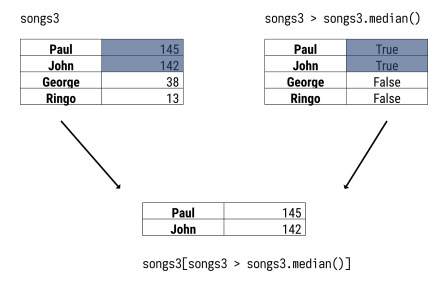

##Uso do array booleano 

Serie de valores booleanos com o mesmo indice da série que estamos trabalhando

In [ ]:
mask = songs3 > songs3.median() # Boolean array

In [ ]:
mask

Paul       True
John       True
George    False
Ringo     False
Name: counts, dtype: bool

Uso do array de boleanos, como um **filtro**. Passamos a mascara dentro da operação de indice

In [ ]:
songs3[mask]

Paul    145
John    142
Name: counts, dtype: int64

O **Numpy** não possui um método para mediana e sim uma função. Portanto o equivalente seria:

In [ ]:
numpy_ser[numpy_ser > np.median(numpy_ser)]

array([145, 142])

#Dados Categóricos

In [ ]:
s = pd.Series(['m', 'l', 'xs', 's', 'xl'], dtype='category')

In [ ]:
s

0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['l', 'm', 's', 'xl', 'xs']

Por default uma série do tipo categoria não possue ordenação. Como pode ser visto abaixo:

In [ ]:
s.cat.ordered

False

Porém se a série representa uma classificação a qual temos uma ordem,  podemos converter uma série não-categórica em uma serie categórica ordenada criando um novo tipo com o uso do `CategoricalDType`

In [ ]:
s2 = pd.Series(['m', 'l', 'xs', 's', 'xl'])

size_type = pd.api.types.CategoricalDtype(
    categories=['s', 'm', 'l'], ordered=True)

s3 = s2.astype(size_type)
s3

0      m
1      l
2    NaN
3      s
4    NaN
dtype: category
Categories (3, object): ['s' < 'm' < 'l']

In [ ]:
s3 > 's'

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [ ]:
s.cat.reorder_categories(['xs', 's', 'm', 'l', 'xl'],
                         ordered=True)

0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

In [ ]:
s3.index

RangeIndex(start=0, stop=5, step=1)

#***Exercicios***

---



1. Create a series with the temperature values for the last seven days. 
Filter out the values below the mean.

In [ ]:
temp = pd.Series([32, 30, 28, 27, 22, 21, 24],
                 index=['day7', 'day6', 'day5', 'day4', 'day3', 'day2', 'day1' ])

In [ ]:
temp

day7    32
day6    30
day5    28
day4    27
day3    22
day2    21
day1    24
dtype: int64

In [ ]:
mask = temp < temp.mean()
mask

day7    False
day6    False
day5    False
day4    False
day3     True
day2     True
day1     True
dtype: bool

In [ ]:
temp[temp < temp.mean()]

day3    22
day2    21
day1    24
dtype: int64

2. Create a series with your favorite colors. Use a categorical type.

In [ ]:
colour = pd.Series(["Azul", "Verde", "Amarelo"], dtype='category')
colour

0       Azul
1      Verde
2    Amarelo
dtype: category
Categories (3, object): ['Amarelo', 'Azul', 'Verde']